In [78]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan

In [79]:
# Step 1: Data Collection
df = pd.read_csv('/content/drive/MyDrive/CSV files/final_crime_data.csv')  # Replace with your file path

In [80]:
df.head()

,Country,Crime Rate,GDP,Unemployment rate,Urban land area,Population density,Internet Usage rate,Primary completion rate,Sex ratio at birth,Weapon rate,GPI
0,Afghanistan,78.6,2092.87995,14.100,3993.836110,61.480554,18.4000,67.500000,1.052,12.5,3.294
1,Albania,45.7,19492.7831,11.590,827.693957,102.615547,82.6137,98.223259,1.072,11.2,1.809
2,Angola,65.4,7928.6415,14.690,2991.346990,27.676084,39.2935,58.000000,1.027,70.0,2.043
3,Argentina,64.3,29037.4891,6.805,11432.730600,16.738742,88.3754,105.479530,1.051,16.7,1.855
4,Armenia,22.0,20445.0989,8.610,922.335027,98.032104,77.0277,100.631844,1.091,7.4,2.052


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  136 non-null    object 
 1   Crime Rate               136 non-null    float64
 2   GDP                      136 non-null    object 
 3   Unemployment rate        133 non-null    float64
 4   Urban land area          136 non-null    float64
 5   Population density       136 non-null    float64
 6   Internet Usage rate      136 non-null    float64
 7   Primary completion rate  136 non-null    float64
 8   Sex ratio at birth       136 non-null    float64
 9   Weapon rate              136 non-null    float64
 10  GPI                      136 non-null    float64
dtypes: float64(9), object(2)
memory usage: 11.8+ KB


In [82]:
# Step 2: Data Cleaning
# Remove duplicates
df = df.drop_duplicates()

In [83]:
df.isna().sum()

Country                    0
Crime Rate                 0
GDP                        0
Unemployment rate          3
Urban land area            0
Population density         0
Internet Usage rate        0
Primary completion rate    0
Sex ratio at birth         0
Weapon rate                0
GPI                        0
dtype: int64

In [84]:
df.dropna(inplace=True)

In [85]:
print(df.columns)


Index(['Country', 'Crime Rate', 'GDP', 'Unemployment rate', 'Urban land area',
       'Population density', 'Internet Usage rate ', 'Primary completion rate',
       'Sex ratio at birth', 'Weapon rate', 'GPI'],
      dtype='object')


In [86]:
df[df['GDP'] == '56,495.85']

,Country,Crime Rate,GDP,Unemployment rate,Urban land area,Population density,Internet Usage rate,Primary completion rate,Sex ratio at birth,Weapon rate,GPI
28,Cuba,31.6,"56,495.85",1.25,3053.18468,108.44289,73.2178,96.634758,1.072,10.0,2.16


In [87]:
df['GDP'][28]=56495.85

<ipython-input-87-f3b5b1ba353e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP'][28]=56495.85


In [88]:
df['GDP']=df['GDP'].astype(float)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  133 non-null    object 
 1   Crime Rate               133 non-null    float64
 2   GDP                      133 non-null    float64
 3   Unemployment rate        133 non-null    float64
 4   Urban land area          133 non-null    float64
 5   Population density       133 non-null    float64
 6   Internet Usage rate      133 non-null    float64
 7   Primary completion rate  133 non-null    float64
 8   Sex ratio at birth       133 non-null    float64
 9   Weapon rate              133 non-null    float64
 10  GPI                      133 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.5+ KB


In [90]:
df=df.drop(columns='Weapon rate')

In [91]:
df.head()

,Country,Crime Rate,GDP,Unemployment rate,Urban land area,Population density,Internet Usage rate,Primary completion rate,Sex ratio at birth,GPI
0,Afghanistan,78.6,2092.87995,14.100,3993.836110,61.480554,18.4000,67.500000,1.052,3.294
1,Albania,45.7,19492.78310,11.590,827.693957,102.615547,82.6137,98.223259,1.072,1.809
2,Angola,65.4,7928.64150,14.690,2991.346990,27.676084,39.2935,58.000000,1.027,2.043
3,Argentina,64.3,29037.48910,6.805,11432.730600,16.738742,88.3754,105.479530,1.051,1.855
4,Armenia,22.0,20445.09890,8.610,922.335027,98.032104,77.0277,100.631844,1.091,2.052


<Axes: >

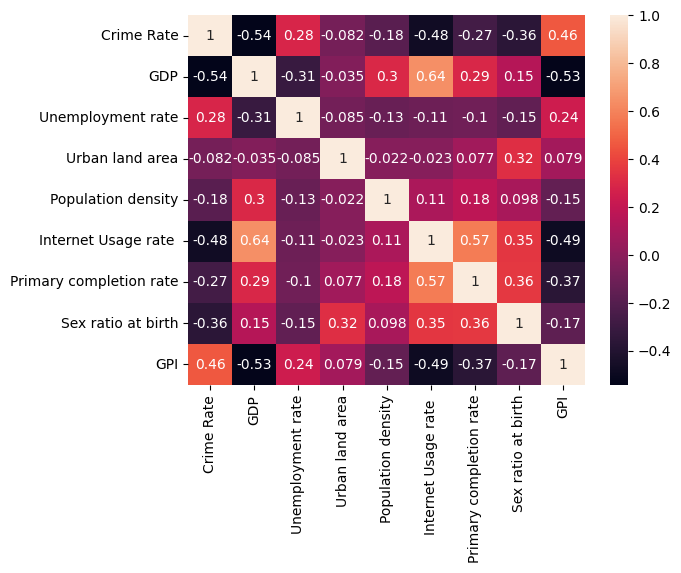

In [92]:
import seaborn as sns
df_numeric = df.drop(columns='Country')
sns.heatmap(df_numeric.corr(), annot=True)

In [93]:
df.columns

Index(['Country', 'Crime Rate', 'GDP', 'Unemployment rate', 'Urban land area',
       'Population density', 'Internet Usage rate ', 'Primary completion rate',
       'Sex ratio at birth', 'GPI'],
      dtype='object')

In [94]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
X = df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI']]
y = df['Crime Rate']  # Assuming this is your dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime Rate   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     11.23
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           7.41e-12
Time:                        20:56:16   Log-Likelihood:                -512.04
No. Observations:                 133   AIC:                             1042.
Df Residuals:                     124   BIC:                             1068.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [95]:
# Step 4: Skewness Checking
# Check skewness and apply transformation if necessary
skewness = df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI','Crime Rate']].skew()
print("Skewness of features:\n", skewness)

Skewness of features:
 GDP                        1.492229
Unemployment rate          2.026540
Urban land area            8.351959
Population density         6.974879
Internet Usage rate       -1.399928
Primary completion rate   -1.223232
Sex ratio at birth         0.854400
GPI                        0.617522
Crime Rate                 0.132730
dtype: float64


In [96]:
df['GDP'] = np.log(df['GDP'])  # Adding 1 to avoid log(0) error
df['Unemployment rate'] = np.log(df['Unemployment rate'])
df['Urban land area'] = np.log(df['Urban land area'])
df['Population density'] = np.log(df['Population density'])

In [97]:
#Again checking skewness after transformation
skewness = df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI','Crime Rate']].skew()
print("Skewness of features:\n", skewness)

Skewness of features:
 GDP                       -0.535021
Unemployment rate         -0.955403
Urban land area            0.053765
Population density         0.057392
Internet Usage rate       -1.399928
Primary completion rate   -1.223232
Sex ratio at birth         0.854400
GPI                        0.617522
Crime Rate                 0.132730
dtype: float64


In [98]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df['Internet Usage rate'] = scaler.fit_transform(df[['Internet Usage rate']])
#df['Primary completion rate'] = scaler.fit_transform(df[['Primary completion rate']])

In [99]:
df.head()

,Country,Crime Rate,GDP,Unemployment rate,Urban land area,Population density,Internet Usage rate,Primary completion rate,Sex ratio at birth,GPI
0,Afghanistan,78.6,7.646296,2.646175,8.292507,4.118721,18.4000,67.500000,1.052,3.294
1,Albania,45.7,9.877800,2.450143,6.718643,4.630989,82.6137,98.223259,1.072,1.809
2,Angola,65.4,8.978237,2.687167,8.003479,3.320569,39.2935,58.000000,1.027,2.043
3,Argentina,64.3,10.276343,1.917658,9.344236,2.817726,88.3754,105.479530,1.051,1.855
4,Armenia,22.0,9.925498,2.152924,6.826909,4.585295,77.0277,100.631844,1.091,2.052


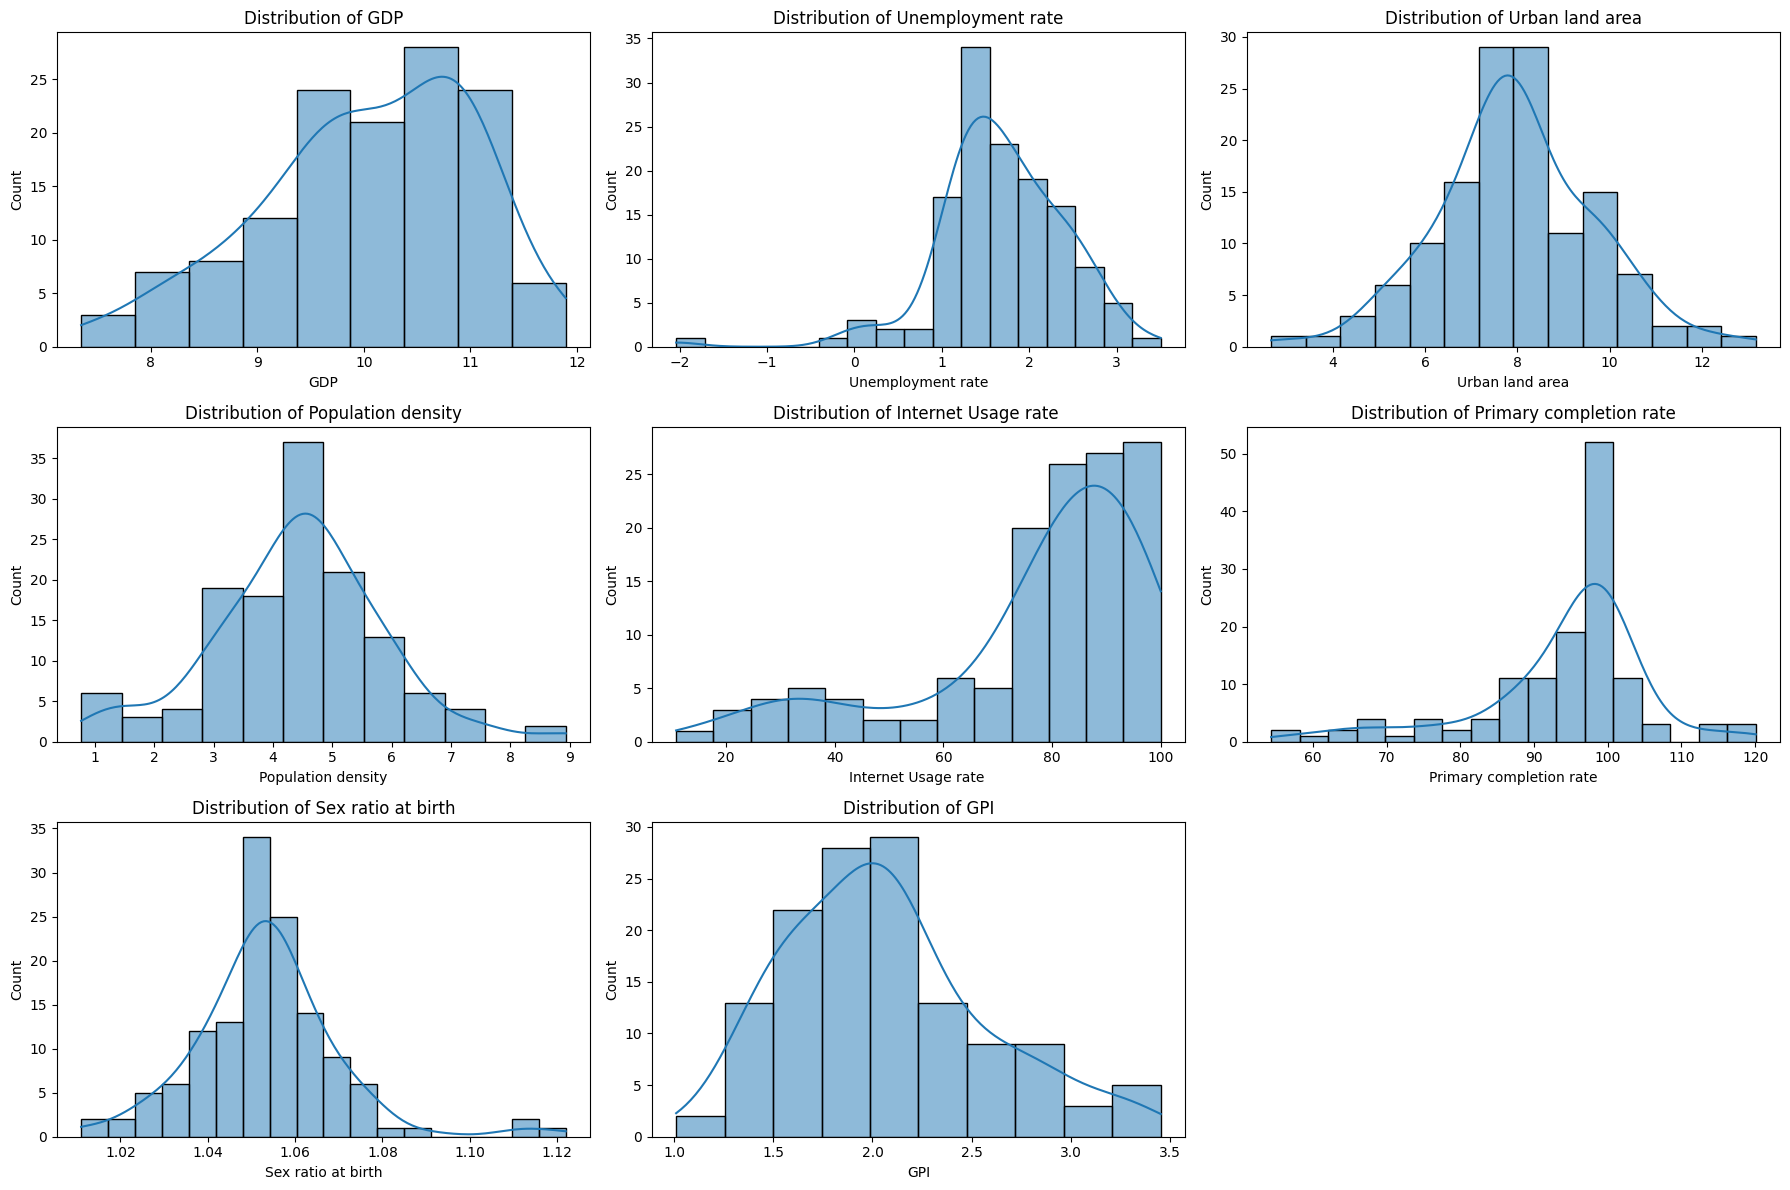

In [100]:
# Define the columns you want to plot
columns = ['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI']

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Loop through each column to plot
for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size as per the number of columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [101]:
# Step 5: Data Scaling
#scaler = StandardScaler()
X = df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI']]
y = df['Crime Rate']
#X_scaled = scaler.fit_transform(X)
#X_scaled = sm.add_constant(X_scaled)

In [102]:
#from sklearn.preprocessing import StandardScaler

# Standardize GDP
#scaler_y = StandardScaler()
#y_scaled = scaler_y.fit_transform(df[['GDP']])

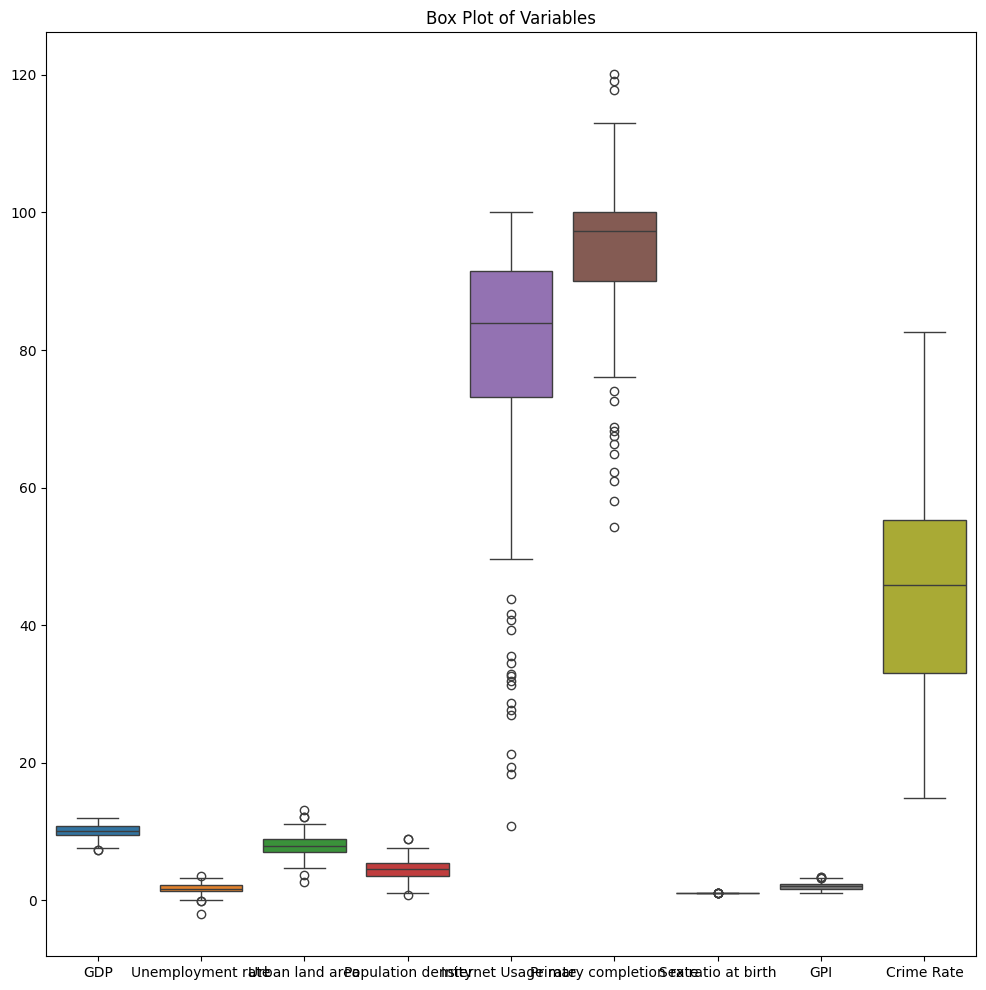

In [103]:
# Step 6: Exploratory Data Analysis (EDA)
# Plot box plots
plt.figure(figsize=(12, 12))
sns.boxplot(data=df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI','Crime Rate']])
plt.title('Box Plot of Variables')
plt.show()

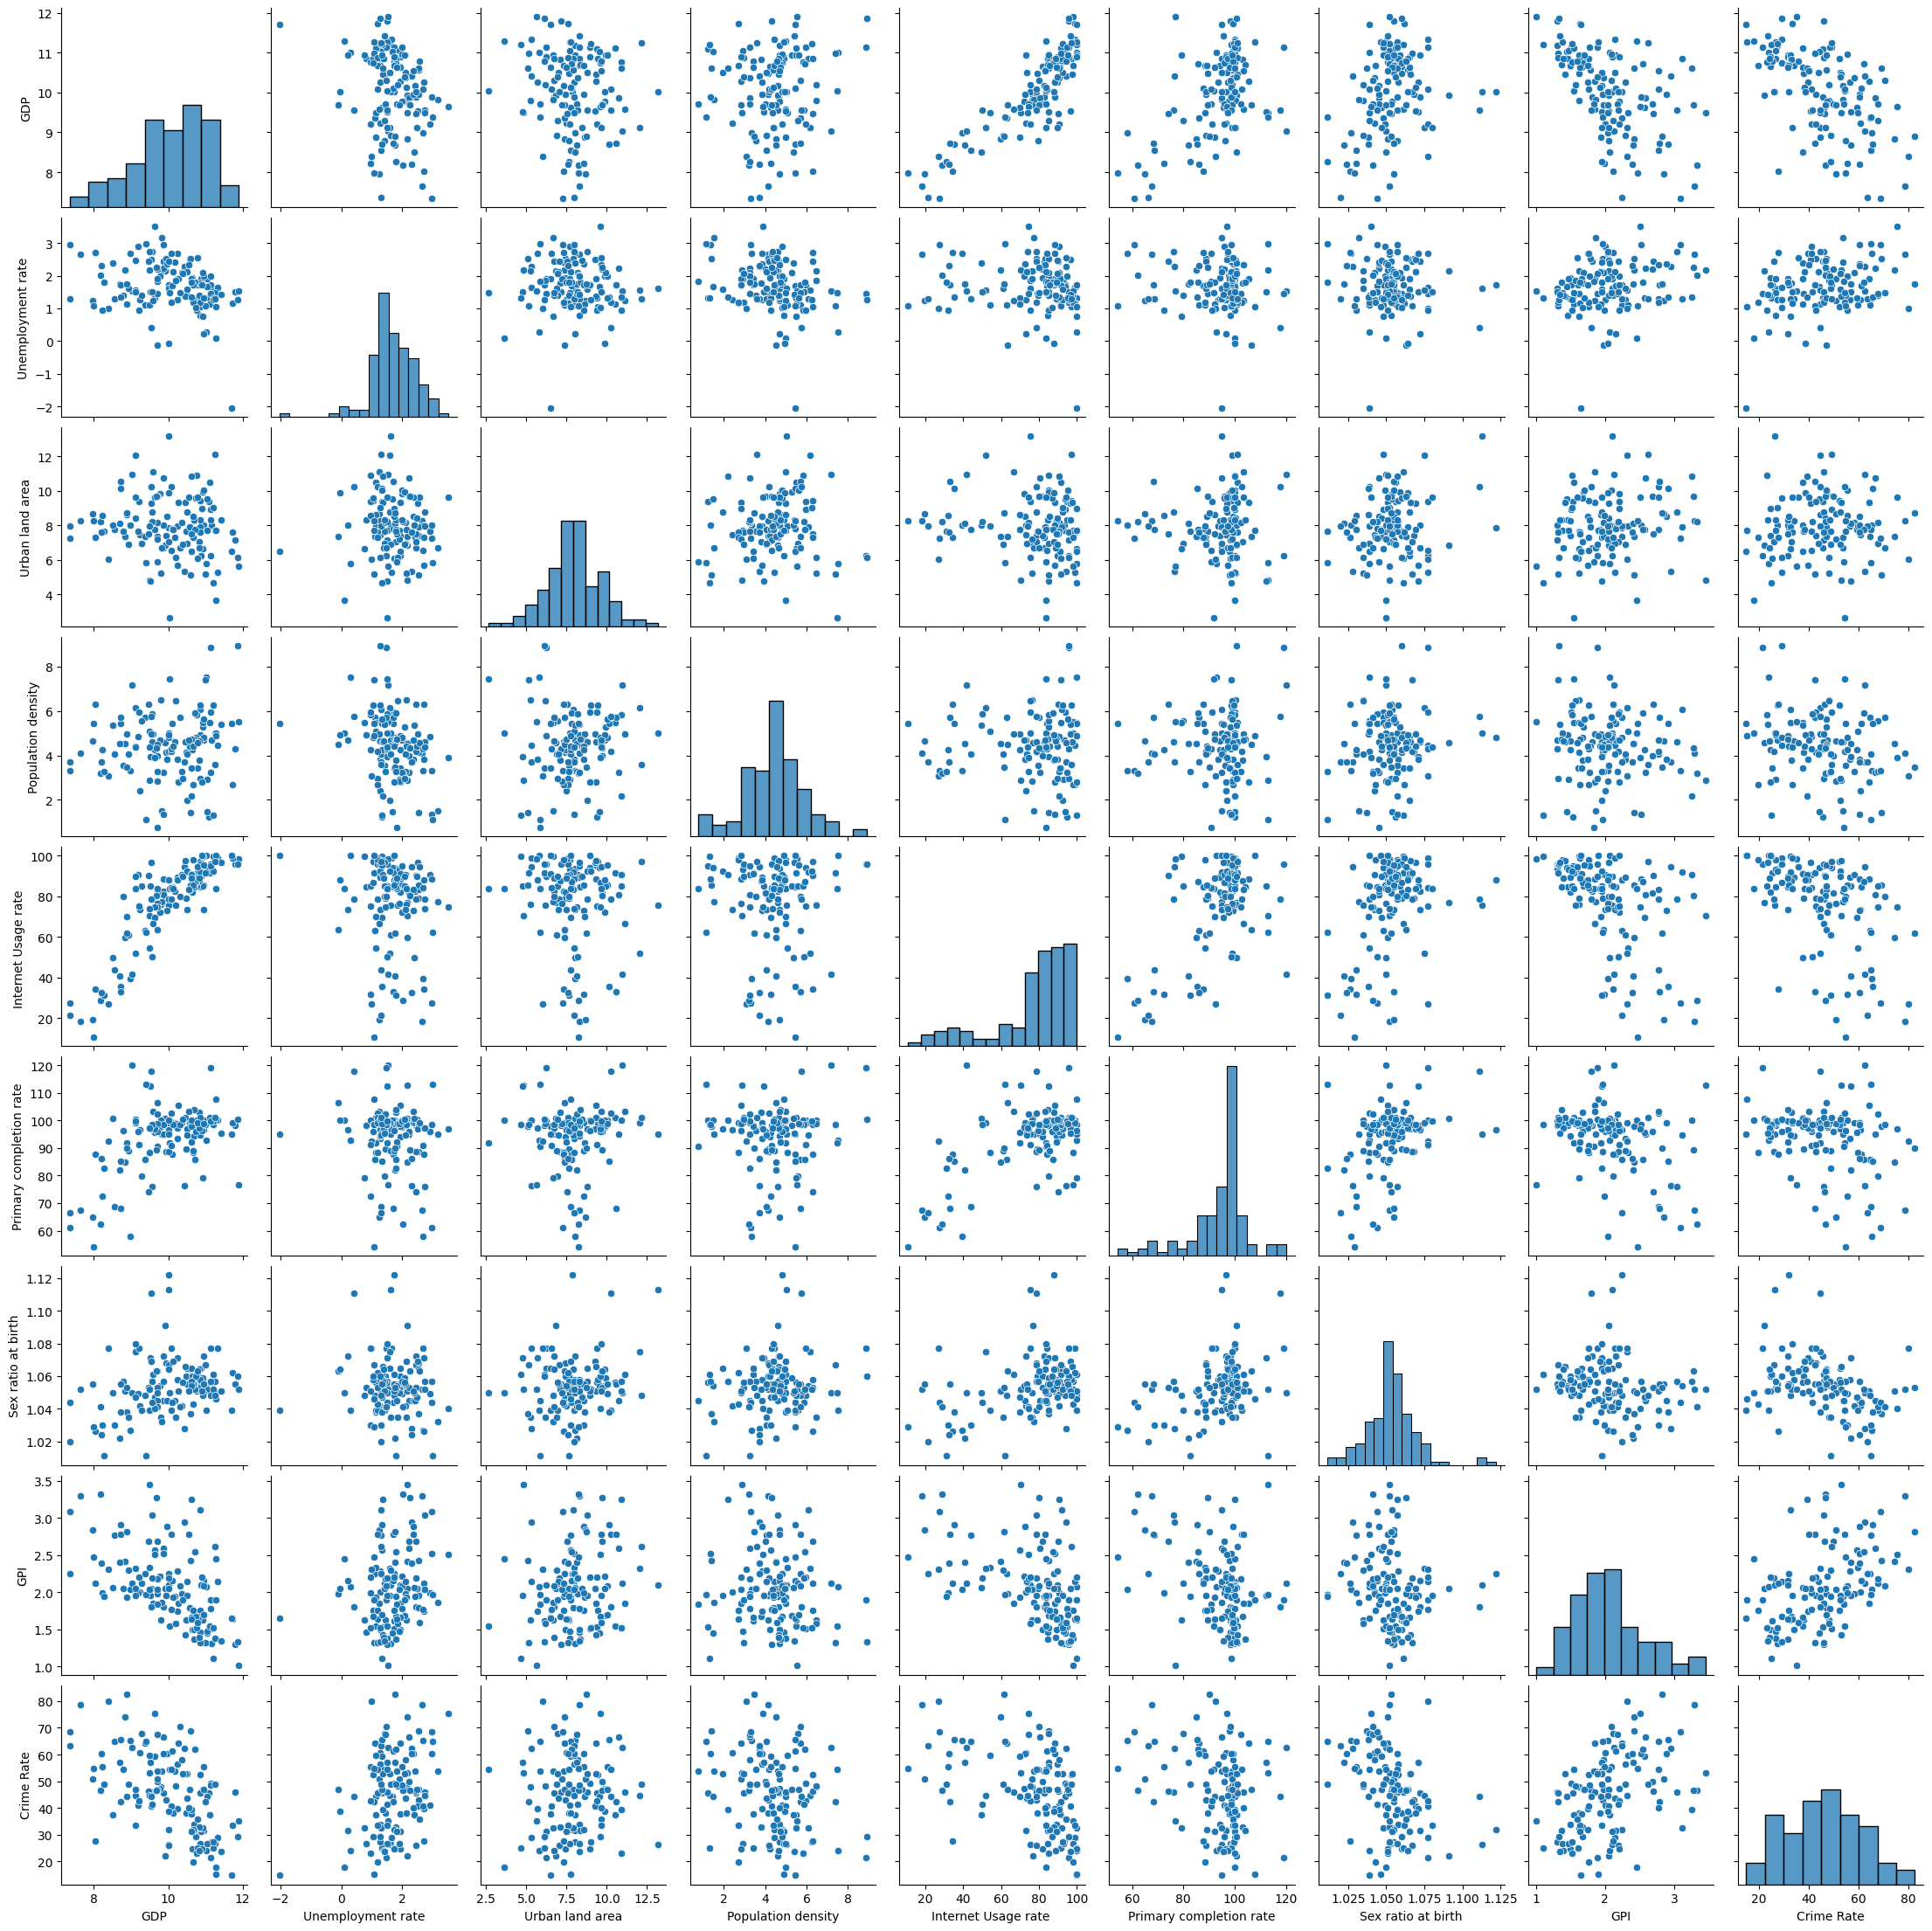

In [104]:
# Plot scatter plots
sns.pairplot(df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI','Crime Rate']])
plt.show()

In [105]:
# Correlation Matrix
df_numeric = df.drop(columns='Country')
corr_matrix = df_numeric.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                          Crime Rate       GDP  Unemployment rate  \
Crime Rate                 1.000000 -0.564174           0.308963   
GDP                       -0.564174  1.000000          -0.266191   
Unemployment rate          0.308963 -0.266191           1.000000   
Urban land area            0.058096 -0.105533          -0.033394   
Population density        -0.250026  0.088510          -0.281796   
Internet Usage rate       -0.475753  0.866956          -0.113635   
Primary completion rate   -0.271043  0.518057          -0.104859   
Sex ratio at birth        -0.364247  0.280126          -0.100957   
GPI                        0.462194 -0.554119           0.223628   

                         Urban land area  Population density  \
Crime Rate                      0.058096           -0.250026   
GDP                            -0.105533            0.088510   
Unemployment rate              -0.033394           -0.281796   
Urban land area                 1.000000  

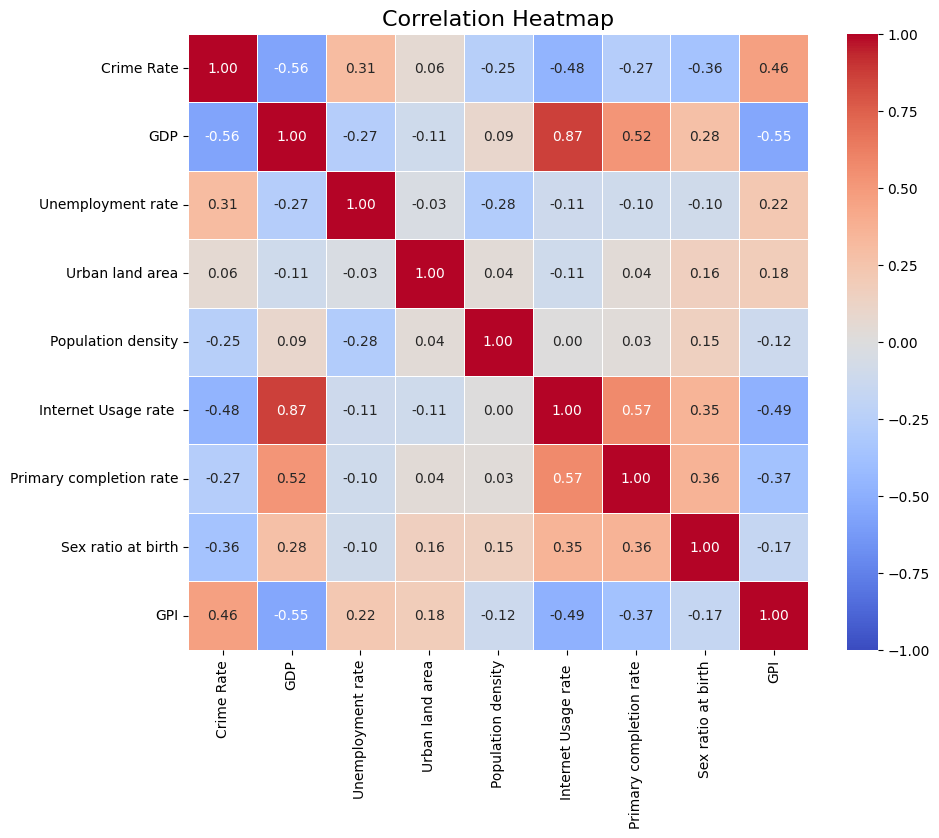

In [106]:
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Set plot title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [107]:
X.isna().sum()

GDP                        0
Unemployment rate          0
Urban land area            0
Population density         0
Internet Usage rate        0
Primary completion rate    0
Sex ratio at birth         0
GPI                        0
dtype: int64

In [108]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
X = df[['GDP', 'Unemployment rate', 'Urban land area', 'Population density', 'Internet Usage rate ', 'Primary completion rate', 'Sex ratio at birth','GPI']]
y = df['Crime Rate']  # Assuming this is your dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime Rate   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     12.21
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           9.01e-13
Time:                        20:56:50   Log-Likelihood:                -509.63
No. Observations:                 133   AIC:                             1037.
Df Residuals:                     124   BIC:                             1063.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = range(X.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("VIF Data:\n", vif_data)

VIF Data:
    Variable          VIF
0         0  5220.288094
1         1     4.930670
2         2     1.231003
3         3     1.100147
4         4     1.128479
5         5     4.938640
6         6     1.599595
7         7     1.281497
8         8     1.530099


In [110]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
X = df[['GDP', 'Unemployment rate', 'Population density', 'Primary completion rate', 'Sex ratio at birth','GPI']]
y = df['Crime Rate']  # Assuming this is your dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime Rate   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     16.51
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.64e-14
Time:                        20:56:50   Log-Likelihood:                -509.69
No. Observations:                 133   AIC:                             1033.
Df Residuals:                     126   BIC:                             1054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = range(X.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("VIF Data:\n", vif_data)

VIF Data:
    Variable          VIF
0         0  4450.589458
1         1     1.805355
2         2     1.169040
3         3     1.112476
4         4     1.497784
5         5     1.190318
6         6     1.485203


In [112]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
X = df[['GDP', 'Population density',  'Sex ratio at birth','GPI']]
y = df['Crime Rate']  # Assuming this is your dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime Rate   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.78e-14
Time:                        20:56:50   Log-Likelihood:                -511.91
No. Observations:                 133   AIC:                             1034.
Df Residuals:                     128   BIC:                             1048.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                287.3088     65

In [113]:
# Step 9: Residual Analysis
# Calculate residuals
y_pred = model.predict(X)
#y_pred = y_pred.reshape(-1, 1)
residuals = y - y_pred

In [114]:
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of residuals: {residuals.shape}")
print(f"Shape of X_scaled: {X.shape}")
print(f"Shape of y_scaled: {y.shape}")

Shape of y_pred: (133,)
Shape of residuals: (133,)
Shape of X_scaled: (133, 5)
Shape of y_scaled: (133,)


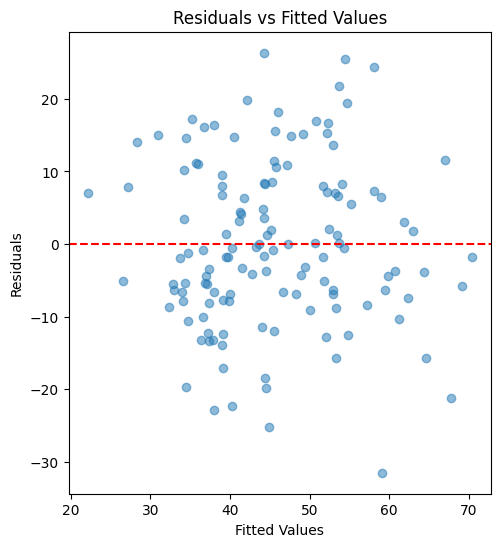

In [115]:

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')

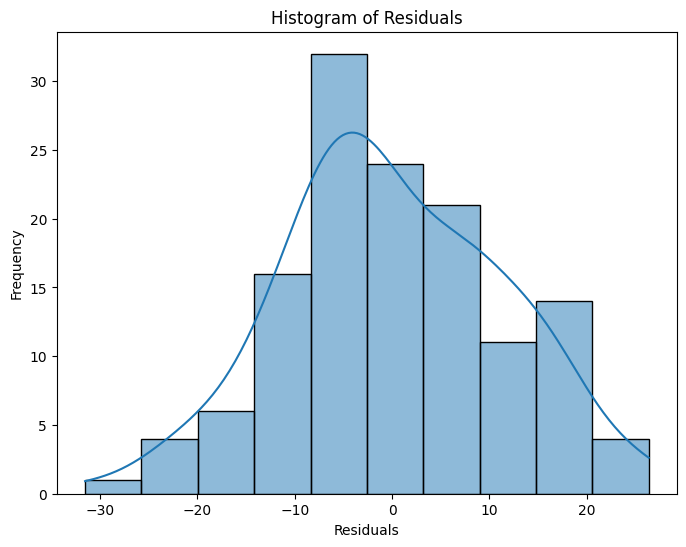

In [116]:
# Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



In [117]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calculate residuals from your OLS model
residuals = model.resid  # assuming 'model' is your fitted OLS model

# Perform Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, X)
bp_test_names = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
bp_test_results = dict(zip(bp_test_names, bp_test))
print("Breusch-Pagan Test Results:", bp_test_results)

Breusch-Pagan Test Results: {'Lagrange Multiplier Statistic': 4.449759524610495, 'p-value': 0.3485463372087461, 'f-value': 1.1076782451822496, 'f p-value': 0.3558450690746474}


In [118]:
# Perform Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, X)
bp_test_names = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
bp_test_results = dict(zip(bp_test_names, bp_test))
print("Breusch-Pagan Test Results:")
for name, result in bp_test_results.items():
    print(f"{name}: {result}")

Breusch-Pagan Test Results:
Lagrange Multiplier Statistic: 4.449759524610495
p-value: 0.3485463372087461
f-value: 1.1076782451822496
f p-value: 0.3558450690746474


In [119]:
import statsmodels.api as sm

# Assuming X is your independent variable(s) and y is your dependent variable
X = sm.add_constant(X)  # Add a constant for the intercept
model = sm.OLS(y, X).fit()

# Get robust standard errors
robust_results = model.get_robustcov_results(cov_type='HC3')  # HC3 is a common choice

# Display summary
print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime Rate   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     23.60
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.24e-14
Time:                        20:56:51   Log-Likelihood:                -511.91
No. Observations:                 133   AIC:                             1034.
Df Residuals:                     128   BIC:                             1048.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                287.3088     65